<a href="https://colab.research.google.com/github/NITIN0210/sampleP/blob/master/BestModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, classification_report

import tensorflow as tf
import keras
import cv2
from skimage.io import imread

import numpy as np
from keras.preprocessing.image import array_to_img
from PIL import Image as ima

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nitin2k","key":"f757bb15b1064ada9159e8226c9a7da7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
file_name = 'fer2013.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
print("done")

done


[[255 255 255 ... 116  88  47]
 [255 255 255 ...  51  83  94]
 [255 255 255 ...  62  74  73]
 ...
 [216 224 217 ... 195 194 192]
 [227 222 209 ... 173 176 173]
 [227 210 196 ... 138 136 146]] <class 'numpy.ndarray'>


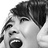

In [6]:

im = imread("/content/test/fear/PrivateTest_10153550.jpg")
print(im,type(im))
data = ima.fromarray(im)
data

In [7]:
picture_size = 48
train_folder_path = "train/"
test_folder_path = "test/"

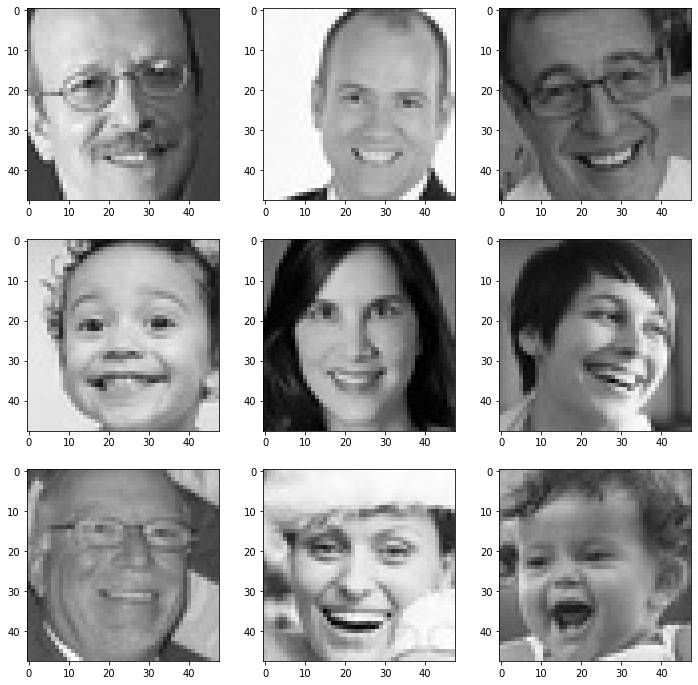

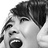

[[255 255 255 ... 116  88  47]
 [255 255 255 ...  51  83  94]
 [255 255 255 ...  62  74  73]
 ...
 [216 224 217 ... 195 194 192]
 [227 222 209 ... 173 176 173]
 [227 210 196 ... 138 136 146]] <class 'numpy.ndarray'>


In [8]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(train_folder_path+expression+"/"+os.listdir(train_folder_path+expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()
im = imread("/content/test/fear/PrivateTest_10153550.jpg")
print(im,type(im))
data = ima.fromarray(im)
data

In [ ]:
batch_size  = 64


datagen_train  = ImageDataGenerator(rescale=1.0/255.0)
datagen_val = ImageDataGenerator(rescale=1.0/255.0)



In [9]:
batch_size  = 64


datagen_train  = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)
datagen_val = ImageDataGenerator(rescale=1.0/255.0)

train_set = datagen_train.flow_from_directory(train_folder_path,target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',shuffle=True,subset="training")
validation_generator = datagen_train.flow_from_directory(train_folder_path, target_size=(picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',subset='validation')
#classes=['surprise','happy']
test_set = datagen_val.flow_from_directory(test_folder_path,target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',shuffle=False)
train_folder_path
type(train_set)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


keras.preprocessing.image.DirectoryIterator

In [10]:
dataset = tf.data.Dataset.from_generator(
    lambda: train_set,
    output_types = (tf.float32, tf.float32),
    output_shapes = ([None, 48, 48, 1], [None,7]),
)
#print(dataset)
#print((list(dataset.take(1).as_numpy_iterator())[0][0]).shape)
#dataset.shape


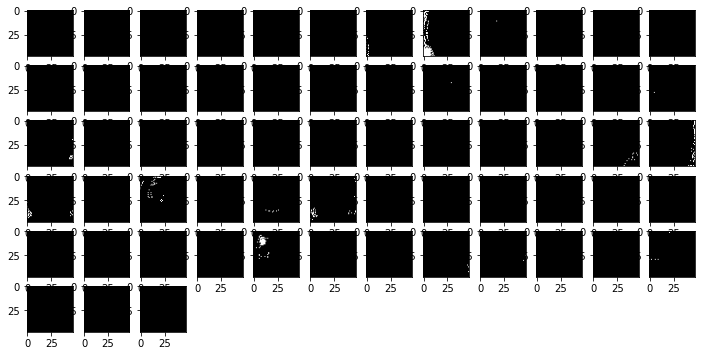

In [11]:
plt.figure(figsize= (12,12))
for i in range(1,64):
    plt.subplot(12,12,i)
    
    x = (list(dataset.take(2).as_numpy_iterator())[0][0][i]).reshape(48,48)
    x = x.astype(np.uint8)#converting float to 0-255
    data = ima.fromarray(x)
    data
    plt.imshow(data,cmap='gray')   
plt.show()


In [29]:

from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))    

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 46, 46, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=1, save_best_only=True)


In [31]:
epochs = 100
history = model.fit(train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = validation_generator,validation_steps = validation_generator.n//validation_generator.batch_size,callbacks=[lr_reducer, checkpointer, early_stopper])

#history = model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)
#model.summary()

Epoch 1/100
358/358 [==============================] - ETA: 0s - loss: 2.0355 - accuracy: 0.1997
Epoch 1: val_loss improved from inf to 1.84213, saving model to ./model.h5
358/358 [==============================] - 25s 65ms/step - loss: 2.0355 - accuracy: 0.1997 - val_loss: 1.8421 - val_accuracy: 0.2514 - lr: 0.0010
Epoch 2/100
358/358 [==============================] - ETA: 0s - loss: 1.8578 - accuracy: 0.2383
Epoch 2: val_loss improved from 1.84213 to 1.81748, saving model to ./model.h5
358/358 [==============================] - 23s 64ms/step - loss: 1.8578 - accuracy: 0.2383 - val_loss: 1.8175 - val_accuracy: 0.2512 - lr: 0.0010
Epoch 3/100
358/358 [==============================] - ETA: 0s - loss: 1.8339 - accuracy: 0.2467
Epoch 3: val_loss improved from 1.81748 to 1.81568, saving model to ./model.h5
358/358 [==============================] - 23s 65ms/step - loss: 1.8339 - accuracy: 0.2467 - val_loss: 1.8157 - val_accuracy: 0.2516 - lr: 0.0010
Epoch 4/100
358/358 [=================

In [32]:
history.history


{'accuracy': [0.19965945184230804,
  0.2382553219795227,
  0.24672546982765198,
  0.24986901879310608,
  0.25144079327583313,
  0.2650628685951233,
  0.2879846394062042,
  0.3123035132884979,
  0.3450489044189453,
  0.38364478945732117,
  0.39918792247772217,
  0.4148620367050171,
  0.4247293174266815,
  0.4284404516220093,
  0.43245720863342285,
  0.4393119215965271,
  0.4454680383205414,
  0.44869890809059143,
  0.4507509469985962,
  0.45756199955940247,
  0.4609675109386444,
  0.4698742628097534,
  0.4682588279247284,
  0.4872511327266693,
  0.500654935836792,
  0.5161107182502747,
  0.5285976529121399,
  0.5373733639717102,
  0.5485941171646118,
  0.561081051826477,
  0.5684596300125122,
  0.5765805244445801,
  0.582649290561676,
  0.5915560722351074,
  0.5987163782119751,
  0.6070555448532104,
  0.612818717956543,
  0.621026873588562,
  0.6265281438827515,
  0.6349982619285583,
  0.6411107182502747,
  0.6536849737167358,
  0.6648183465003967,
  0.6703632473945618,
  0.681453049182

In [34]:
new_model = tf.keras.models.load_model('./model.h5')


In [39]:

import cv2
import tensorflow as tf
Categories = ['sad']

def prepare(filepath):
    Img_size = 48
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(Img_size,Img_size))
    new_array=new_array/255.0
    print(new_array)
    return new_array.reshape(-1, Img_size, Img_size, 1)
prediction = new_model.predict([prepare('/content/test/happy/PrivateTest_10513598.jpg')])
print(prediction)


[[0.88627451 0.8745098  0.55294118 ... 0.04705882 0.12156863 0.11372549]
 [0.83529412 0.89019608 0.58823529 ... 0.01176471 0.03529412 0.14509804]
 [0.81960784 0.74117647 0.6627451  ... 0.05098039 0.01960784 0.04705882]
 ...
 [0.9372549  0.9372549  0.92941176 ... 0.32156863 0.48627451 0.46666667]
 [0.9254902  0.93333333 0.93333333 ... 0.35294118 0.48235294 0.44313725]
 [0.92156863 0.93333333 0.92941176 ... 0.52156863 0.45490196 0.45882353]]
[[1.25101311e-02 6.36778641e-05 3.64723578e-02 7.96372056e-01
  1.35781495e-02 1.88960019e-03 1.39113963e-01]]


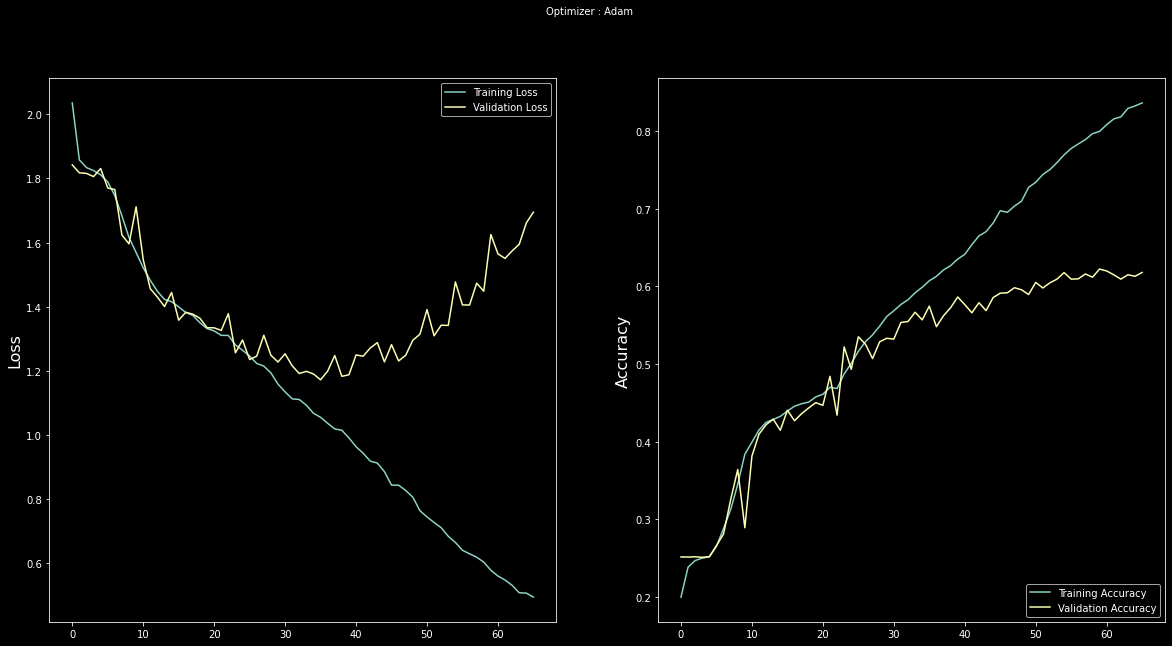

In [40]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


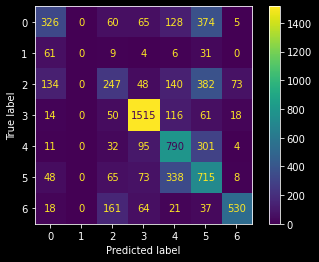

angry-0,disgust-1,fear-2,happy-3,neutral-4,sad-5,surprise-6
Accuracy= 0.5743939816104765
Balanced Accuracy= 0.46962586816567237


In [41]:
Y_pred = new_model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_set.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('angry-0,disgust-1,fear-2,happy-3,neutral-4,sad-5,surprise-6')

print("Accuracy=",accuracy_score(test_set.classes, y_pred))
print("Balanced Accuracy=",balanced_accuracy_score(test_set.classes, y_pred))

In [42]:
target_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       angry       0.53      0.34      0.42       958
     disgust       0.00      0.00      0.00       111
        fear       0.40      0.24      0.30      1024
       happy       0.81      0.85      0.83      1774
     neutral       0.51      0.64      0.57      1233
         sad       0.38      0.57      0.45      1247
    surprise       0.83      0.64      0.72       831

    accuracy                           0.57      7178
   macro avg       0.49      0.47      0.47      7178
weighted avg       0.58      0.57      0.56      7178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
Y_pred = new_model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
x = confusion_matrix(test_set.classes, y_pred)
a1 = x.sum(axis=1)
a2 = x.diagonal()
print(x)
print(a2)
print(a1)
print(a2/a1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[[ 326    0   60   65  128  374    5]
 [  61    0    9    4    6   31    0]
 [ 134    0  247   48  140  382   73]
 [  14    0   50 1515  116   61   18]
 [  11    0   32   95  790  301    4]
 [  48    0   65   73  338  715    8]
 [  18    0  161   64   21   37  530]]
[ 326    0  247 1515  790  715  530]
[ 958  111 1024 1774 1233 1247  831]
[0.34029228 0.         0.24121094 0.85400225 0.64071371 0.5733761
 0.6377858 ]
